**Assignment Week 9**

Due: 3/25/2024

Shimon Greengart

First, I get the data using the professor's code.

In [ ]:
import pandas as pd

!pip install kaggle --upgrade
print ("writing kaggle")
!echo "{\"username\":\"shimongreengart\",\"key\":\"c659755ac5876b422e520ad3530ab5f5\"}" > kaggle.json
!sudo mkdir -p ~/.kaggle
!sudo cp /content/kaggle.json ~/.kaggle/kaggle.json
print ("got kaggle json copied")
!chmod 600 /root/.kaggle/kaggle.json
!kaggle --version
!kaggle competitions download -c restaurant-revenue-prediction

!unzip restaurant-revenue-prediction.zip

train_df = pd.read_csv('/content/train.csv.zip', compression='zip')
test_df = pd.read_csv('/content/test.csv.zip', compression='zip')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.6-py3-none-any.whl size=111941 sha256=0b8c119c10d7ca35d9a8831becd283c246245013a2dccbf1101cf4fb0899e562
  Stored in directory: /root/.cache/pip/wheels/53/34/8c/8ca3450d17206d9e37e1ee3aeb47cbb2873d22a9e0c60eb137
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16
writing kaggle
got kaggle json copied
Kaggle API 1.6.6
  0% 0.00/2.68M [00:00<?, ?B/s]
100% 2.68M/2.68M [00:00<00:00, 94.9MB/s]
Archive:  restaurant-revenue-prediction.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv.zip            
  inflating: train.csv.zip           


To figure out which ones to use, I found the correlations to see which ones were most correlated with revenue.

In [ ]:
train_df.corr()

<ipython-input-2-a7a80d20a44e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
Id,1.000000,-0.026351,-0.036991,-0.025033,-0.001914,0.010108,-0.025953,-0.080977,-0.052129,-0.068655,...,-0.041989,0.075148,-0.019252,0.055963,-0.019958,0.067714,0.003073,0.040799,-0.065791,-0.006277
P1,-0.026351,1.000000,0.836671,0.695928,0.677941,0.302820,0.747296,0.853753,0.760820,0.765743,...,0.586532,0.487589,0.479175,0.552593,0.329795,0.570835,0.449182,0.554951,0.277601,0.070217
P2,-0.036991,0.836671,1.000000,0.473551,0.540322,0.203003,0.673106,0.769842,0.505116,0.481635,...,0.322511,0.342005,0.353477,0.389376,0.234991,0.394319,0.314798,0.387938,0.161162,0.191518
P3,-0.025033,0.695928,0.473551,1.000000,0.443606,0.168891,0.570486,0.651489,0.689173,0.741967,...,0.571525,0.473089,0.406701,0.463217,0.312269,0.501575,0.428504,0.484942,0.284065,-0.024613
P4,-0.001914,0.677941,0.540322,0.443606,1.000000,0.715406,0.595724,0.700482,0.654594,0.675336,...,0.452364,0.387747,0.333626,0.440795,0.182820,0.434245,0.277902,0.411664,0.177916,0.035685
P5,0.010108,0.302820,0.203003,0.168891,0.715406,1.000000,0.326524,0.446154,0.447577,0.465662,...,0.306904,0.244032,0.112603,0.215568,0.071079,0.243040,0.173309,0.193652,0.033548,-0.028191
P6,-0.025953,0.747296,0.673106,0.570486,0.595724,0.326524,1.000000,0.738388,0.720144,0.676323,...,0.563415,0.460618,0.477593,0.519243,0.300611,0.519635,0.413645,0.524552,0.327594,0.139094
P7,-0.080977,0.853753,0.769842,0.651489,0.700482,0.446154,0.738388,1.000000,0.751196,0.775003,...,0.584071,0.509213,0.452471,0.531011,0.339178,0.562561,0.457721,0.543563,0.309678,0.051165
P8,-0.052129,0.760820,0.505116,0.689173,0.654594,0.447577,0.720144,0.751196,1.000000,0.919956,...,0.754736,0.454937,0.420425,0.516617,0.256416,0.524474,0.405709,0.499777,0.308294,-0.084215
P9,-0.068655,0.765743,0.481635,0.741967,0.675336,0.465662,0.676323,0.775003,0.919956,1.000000,...,0.789784,0.502670,0.467334,0.544749,0.326869,0.582042,0.467916,0.551953,0.330927,-0.050352


These were the ones which I found had the highest correlations. Unfortunately, they also have a high correlation with each other, much higher than their correlation with revenue.

In [ ]:
train_df[['P2', 'P6', 'P13', 'P21', 'P28', 'P29', 'revenue']].corr()

# The ones with the highest absolute correlation are P2 (0.19), P28 (0.155), P6 (0.14), P29 (-0.114), P13 (-.105), P21 (0.097)

,P2,P6,P13,P21,P28,P29,revenue
P2,1.000000,0.673106,0.410924,0.522294,0.732712,0.322511,0.191518
P6,0.673106,1.000000,0.558621,0.427613,0.729083,0.563415,0.139094
P13,0.410924,0.558621,1.000000,0.565152,0.576252,0.740722,-0.105085
P21,0.522294,0.427613,0.565152,1.000000,0.729631,0.267466,0.097411
P28,0.732712,0.729083,0.576252,0.729631,1.000000,0.331344,0.155534
P29,0.322511,0.563415,0.740722,0.267466,0.331344,1.000000,-0.114846
revenue,0.191518,0.139094,-0.105085,0.097411,0.155534,-0.114846,1.000000


Professor said on Google Chat that if I already had a train/val/test split, I should make it only train/test to maximize available data.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow.keras as kr
import matplotlib.pyplot as plt
from sklearn import neighbors, metrics, model_selection, preprocessing

train = train_df.to_numpy()
X = train[:, 5:-1].astype('float32')  # Excluding ID and the other string datatypes
y = train[:, -1].astype('float32')

# I split the train from test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
# and the val from the train
#X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.2)

chosen_features = [1, 5, 12, 21, 28, 29] # ['P2', 'P6', 'P13', 'P21', 'P28', 'P29']


For knn, I found that using only the highest-correlated features led to better performance. It's still terrible, though; we don't have eneough data. I noticed that the performance changes wildly depending on which train-test split I get. I see why it would have made sense to use k-fold cross-validation.


I noticed that for both models, Mean Absolute Error is consistently lower than Root Mean Squared Error. I think that that means that this model, while performing terribly in general (off by more than 1 million on average even for the best splits), does even worse for outliers.

In [ ]:

new_X_train = X_train[:, chosen_features]
new_X_val = X_test[:, chosen_features]

knn = neighbors.KNeighborsRegressor(n_neighbors=5, metric='minkowski')
knn.fit(new_X_train, y_train)

knn_predicted_y = knn.predict(new_X_val)

knn_mae = metrics.mean_absolute_error(y_test, knn_predicted_y)
knn_mse = metrics.mean_squared_error(y_test, knn_predicted_y)

knn_rmse = metrics.mean_squared_error(y_test, knn_predicted_y, squared=False)

print(f"MAE: {knn_mae}")
print(f"MSE: {knn_mse}")
print(f"RMSE: {knn_rmse}\n")

for real_y, pred_y in zip(y_test, knn_predicted_y):
    print(f"Real was {real_y}, but test was {pred_y}")


MAE: 1687203.25
MSE: 7173332533248.0
RMSE: 2678307.75

Real was 5500818.0, but test was 3467534.75
Real was 4015749.0, but test was 4047826.0
Real was 4100886.0, but test was 4799169.0
Real was 4316715.0, but test was 4705681.0
Real was 3258837.0, but test was 3165825.0
Real was 6923131.0, but test was 3724554.5
Real was 3248660.0, but test was 4199385.0
Real was 3807496.0, but test was 2655850.5
Real was 9652350.0, but test was 7980253.0
Real was 4429512.0, but test was 3470127.25
Real was 3956086.0, but test was 5693764.0
Real was 3273041.0, but test was 2713983.25
Real was 3426169.0, but test was 5693764.0
Real was 6694797.0, but test was 6580969.0
Real was 8904084.0, but test was 4495920.0
Real was 4651866.0, but test was 3361714.5
Real was 2344689.0, but test was 4776502.5
Real was 3445076.0, but test was 3124903.5
Real was 4250553.0, but test was 3775057.5
Real was 2993069.0, but test was 2885756.75
Real was 6941173.0, but test was 4290603.0
Real was 2371202.0, but test was 36388

Like knn, using the highest-correlated fields yielded better performance. For this split, test does much worse than train, but for other splits, it's the other way around. I found that if I standardized the data, results were significantly better, but at the cost of a training time almost 10 times longer.

Which model does better actually depends on the train-test split. For this split, knn does significantly better

Streaming output truncated to the last 5000 lines.
4/4 [==============================] - 0s 36ms/step - loss: 21410929967104.0000 - mean_absolute_error: 3894307.7500 - mean_squared_error: 21410929967104.0000 - root_mean_squared_error: 4627194.5000 - val_loss: 27985446961152.0000 - val_mean_absolute_error: 4708870.5000 - val_mean_squared_error: 27985446961152.0000 - val_root_mean_squared_error: 5290127.5000
Epoch 200/3000
4/4 [==============================] - 0s 29ms/step - loss: 21394377146368.0000 - mean_absolute_error: 3892350.0000 - mean_squared_error: 21394377146368.0000 - root_mean_squared_error: 4625405.5000 - val_loss: 27965360439296.0000 - val_mean_absolute_error: 4706845.5000 - val_mean_squared_error: 27965360439296.0000 - val_root_mean_squared_error: 5288228.5000
Epoch 201/3000
4/4 [==============================] - 0s 27ms/step - loss: 21378415722496.0000 - mean_absolute_error: 3890430.7500 - mean_squared_error: 21378415722496.0000 - root_mean_squared_error: 4623680.0000 -

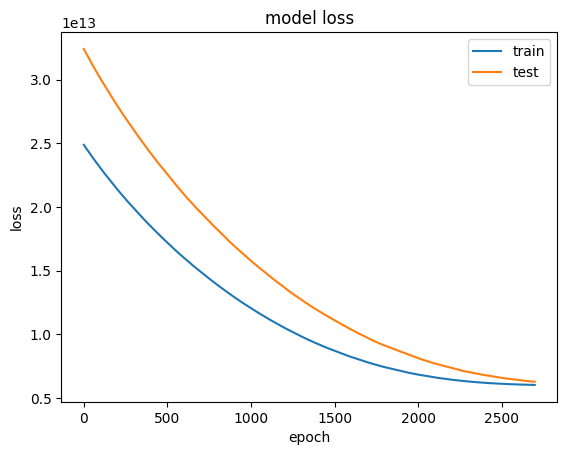

In [ ]:
new_X_train = X_train[:, chosen_features]
new_X_val = X_test[:, chosen_features]

standards = preprocessing.StandardScaler()
standards.fit(new_X_train)
new_X_train = standards.transform(new_X_train)
new_X_val = standards.transform(new_X_val)  # transforming on the same mean and SD as the train data

LEARNING_RATE = 500.0
NUM_FEATURES = len(new_X_train[0])
NUM_EPOCHS = 3000

# A single linear layer with a single output is effectively a linear regression
model = kr.models.Sequential([
    kr.Input(shape=(NUM_FEATURES)),
    kr.layers.Dense(1, activation='linear')
])

model.compile(optimizer=kr.optimizers.Adam(learning_rate=LEARNING_RATE), loss='mean_squared_error',
              metrics=[kr.metrics.MeanAbsoluteError(), kr.metrics.MeanSquaredError(), kr.metrics.RootMeanSquaredError()])
model.summary()
linear_history = model.fit(new_X_train, y_train, epochs=NUM_EPOCHS, validation_data=(new_X_val, y_test),
          callbacks=[kr.callbacks.EarlyStopping(monitor='val_loss', patience=5, start_from_epoch=200)])

# plot the loss
plt.plot(linear_history.history['loss'])
plt.plot(linear_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [ ]:
for X_test_val, y_test_val in zip(new_X_val, y_test):
    pred_val = model(X_test_val.reshape(1, NUM_FEATURES))
    print(f"Original is {y_test_val}, but we got {pred_val[0, 0]}")


# Without standardization: 205 and 296
# With standardization: 168 and 250

Original is 5500818.0, but we got 1477389.625
Original is 4015749.0, but we got 362639.3125
Original is 4100886.0, but we got 1161050.125
Original is 4316715.0, but we got 612447.75
Original is 3258837.0, but we got 885011.5625
Original is 6923131.0, but we got 1068938.625
Original is 3248660.0, but we got 763096.375
Original is 3807496.0, but we got 264830.0625
Original is 9652350.0, but we got 1420129.75
Original is 4429512.0, but we got 875740.25
Original is 3956086.0, but we got 1197877.625
Original is 3273041.0, but we got 356941.625
Original is 3426169.0, but we got 1983640.25
Original is 6694797.0, but we got 1617408.75
Original is 8904084.0, but we got 1020179.9375
Original is 4651866.0, but we got 929645.875
Original is 2344689.0, but we got 856558.5
Original is 3445076.0, but we got 1049983.625
Original is 4250553.0, but we got 783324.0625
Original is 2993069.0, but we got 439781.875
Original is 6941173.0, but we got 1040781.5
Original is 2371202.0, but we got 606750.0625
Ori